In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install transformers 

     |████████████████████████████████| 2.5MB 31.2MB/s 
     |████████████████████████████████| 901kB 51.7MB/s 
     |████████████████████████████████| 3.3MB 51.1MB/s 


In [ ]:
import torch
import pandas as pd
import numpy as np

# Thu vien transformer cho Classification
from transformers import AutoTokenizer, AutoModelForSequenceClassification, RobertaForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification, XLMRobertaForSequenceClassification, RobertaForSequenceClassification

# Xu ly label
from sklearn.preprocessing import LabelEncoder

# Metric danh gia 
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Ve do thi
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# Xay dung data de fit vao mo hinh 
class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
path = "/content/drive/MyDrive/Scocial Media Data Mining/Dataset"

In [ ]:
train = pd.read_csv(path + "/UIT-ViCTSD/UIT-ViCTSD_train.csv", index_col=False)
dev = pd.read_csv(path + "/UIT-ViCTSD/UIT-ViCTSD_valid.csv", index_col=False)
test = pd.read_csv(path + "/UIT-ViCTSD/UIT-ViCTSD_test_text.csv", index_col=False)

In [ ]:
%cd "/content/drive/MyDrive/Scocial Media Data Mining/SourceCode/Tu_PhoBert/UIT-ViCTSD/Toxicity"

/content/drive/.shortcut-targets-by-id/1CZcWZiWtxpQUuZayUBOYLquIpN5fLP1b/Scocial Media Data Mining/SourceCode/Tu_PhoBert/UIT-ViCTSD/Toxicity


In [ ]:
X_train = train['Comment']
y_train = train['Toxicity'].values

X_dev = dev['Comment']
y_dev = dev['Toxicity'].values

#X_test = test['Comment']
#y_test = test['Toxicity'].values

In [ ]:
# encoding label 
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [ ]:
num_labels = len(np.unique(y_train))

In [ ]:
phobert = RobertaForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels = num_labels)
phobert_tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
train_encodings = phobert_tokenizer(X_train.to_list(), truncation=True, padding=True, max_length=40)
dev_encodings = phobert_tokenizer(X_dev.to_list(), truncation=True, padding=True, max_length=40)
#test_encodings = phobert_tokenizer(X_test.to_list(), truncation=True, padding=True, max_length=40)

y_train_encoding = le.transform(y_train)
y_dev_encoding = le.transform(y_dev)
#y_test_encoding = le.transform(y_test)

In [ ]:
# Chuan bi data

train_dataset = BuildDataset(train_encodings, y_train_encoding)
dev_dataset = BuildDataset(dev_encodings, y_dev_encoding)
#test_dataset = BuildDataset(test_encodings, y_test_encoding)

In [ ]:
# Chuan bi mo hinh

training_args = TrainingArguments(
    output_dir='./results_1',          
    num_train_epochs=40,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=32,   
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

phobert_trainer = Trainer(
    model=phobert,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

In [ ]:
phobert_trainer.train()

Step,Training Loss
500,0.310200
1000,0.154900
1500,0.058000
2000,0.028300
2500,0.013000
3000,0.011200
3500,0.010400
4000,0.008500
4500,0.005600
5000,0.010400


TrainOutput(global_step=8760, training_loss=0.03572079657872535, metrics={'train_runtime': 2619.8527, 'train_samples_per_second': 106.876, 'train_steps_per_second': 3.344, 'total_flos': 9071987232000000.0, 'train_loss': 0.03572079657872535, 'epoch': 40.0})

In [ ]:
X_test = test['Comment']
test['Toxicity'] = 0
y_test = test['Toxicity'].values #Gán cho y_test giá trị constant= 0 để đủ 2 cột đưa vào hàm
test_encodings = phobert_tokenizer(X_test.to_list(), truncation=True, padding=True, max_length=40)
y_test_encoding = le.transform(y_test)
test_dataset = BuildDataset(test_encodings, y_test_encoding)

In [ ]:
 # Du doan 
y_pred_classify = phobert_trainer.predict(test_dataset)

y_pred = np.argmax(y_pred_classify.predictions, axis=-1)

In [ ]:
import pandas as pd

pd.DataFrame({"Y_Prediced": y_pred}).to_csv('PhoBert_ViCTSD_Toxicity_1.csv', index= False)

# Đánh giá

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Scocial Media Data Mining/Dataset/UIT-ViCTSD
!ls

/content/drive/.shortcut-targets-by-id/1CZcWZiWtxpQUuZayUBOYLquIpN5fLP1b/Scocial Media Data Mining/Dataset/UIT-ViCTSD
LabelTest.json	UIT-ViCTSD_test_text.csv  UIT-ViCTSD_valid.csv
Test.csv	UIT-ViCTSD_train.csv


In [3]:
import pandas as pd
labelTest= pd.read_json("/content/drive/MyDrive/Scocial Media Data Mining/Dataset/UIT-ViCTSD/LabelTest.json")
labelTest.head()

,,id,comment,constructiveness,toxicity,title,topic
0,0,6252,Người ăn không hết kẻ lần chẳng ra,0,1,28 năm chịu đựng bộ ngực khổng lồ,SucKhoe
1,1,4684,Nhiều người cứ nghĩ đạp xe là văn minh. haizzzz,0,1,Cả trăm người đạp xe thể dục bịt kín đường,OtoXemay
2,2,1731,Rất văn hoá,0,0,Cô gái được bố nhắn nhủ ba từ mỗi ngày,GiaoDuc
3,3,4742,Đời ta ba mươi đời nó. Mua chiếc xe cũng chỉ p...,0,0,Các loại phụ kiện ôtô đại lý hay chào khách,OtoXemay
4,4,4521,"Tước bằng lái vĩnh viễn đi. Chạy lếu láo thật,...",1,1,Ba người thoát chết dưới bánh xe bồn,OtoXemay


In [4]:
# Đọc file labels predict lên
labelPred= pd.read_csv('/content/drive/MyDrive/Scocial Media Data Mining/SourceCode/Tu_PhoBert/UIT-ViCTSD/Toxicity/PhoBert_ViCTSD_Toxicity_1.csv')
labelPred.head()

,Y_Prediced
0,0
1,0
2,0
3,0
4,1


In [21]:
# Đánh giá:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# Danh gia mo hinh
y_true = labelTest.toxicity
#y_pred_classify = model_lstm_cnn.predict(x_test_seq)
#y_pred = y_pred_classify.argmax(axis=-1)
y_pred = labelPred

cf = confusion_matrix(y_true, y_pred, labels= pd.Series(y_true).unique())

print(cf)
print("accuracy: " + str(accuracy_score(y_true, y_pred)))
print("F1 - macro: " + str(f1_score(y_true, y_pred, average='macro')))
target_names = pd.Series(y_true).astype(str).unique()
print('Classification report in Training set')
print(classification_report(y_true, y_pred, labels= pd.Series(y_true).unique(), target_names=target_names))

[[ 42  68]
 [ 37 853]]
accuracy: 0.895
F1 - macro: 0.6932327136634149
Classification report in Training set
              precision    recall  f1-score   support

           1       0.53      0.38      0.44       110
           0       0.93      0.96      0.94       890

    accuracy                           0.90      1000
   macro avg       0.73      0.67      0.69      1000
weighted avg       0.88      0.90      0.89      1000



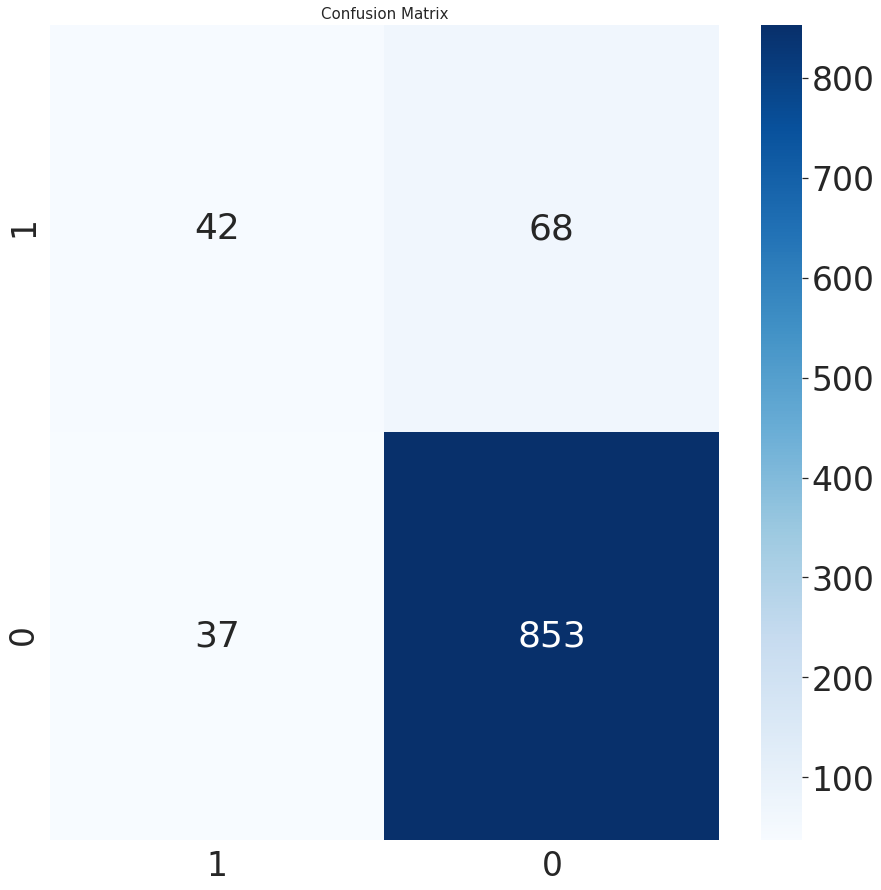

In [31]:
import seaborn as sn
import matplotlib.pyplot as plt
# Ve ma tran nham lan
plt.figure(figsize=(15,15))
df_cm = pd.DataFrame(cf, index = target_names,
                  columns = target_names)
ax = plt.subplot()
sn.set(font_scale=3.0) # Adjust to fit
# Labels, title and ticks
label_font = {'size':'15'}
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);
title_font = {'size': '15'}
# title_font = {​'size':'15'}​  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);
sn.heatmap(df_cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

sn.heatmap(df_cm, annot=False, cmap="Blues", fmt='g', cbar = False, annot_kws={"size":10})
#sn.heatmap(df_cm, annot=False, cmap="Blues",fmt='g', cbar=False, annot_kws={​"size": 10}​)


In [ ]:
import seaborn as sn